---

# Introduction

In this homework you will:

* Recall your skills of data analysis and preprocessing.
* Explore the behaviour of different machine learning models.
* Try to solve a regression type problem and interpret the results.

But first of all, a few notes:

* Check the first homework for a quick reminder on general rules.
* We do not expect you to make a model that makes necessarly good predictions, rather than explain why do you get the results which you get.
* We reserve the right to lower the grade for messy code, so keep it clean and make comments about what you do!
* Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

This time, you will do the coding part yourself. That means, you take decisions about EDA, data cleaning, hyperparameters choice, etc. on your own (for the most part, at least).

Enjoy it while I rest!  \ (•◡•) /

Another important mention: your work must be reproducible.
It means that it would be possible to run your code and obtain the same results by pressing "Run All" button in settings of this notebook. To do so, don't forget to fix the random seed number where possible!

# Dataset

Today your task will be to understand the relationship between the cholesterol level and its associated factors, such as gender, age, BMI, medical condition and some genomic features. This can be explored by a regression analysis using machine learning methods that we learned in the class.

Description of the variables:

* DM: diabetes mellitus: 0 = no diabetes, 1 = diabetes
* age: Age in years
* chol: Serum total cholesterol, mg/dl
* BMI: Body-mass index, kg/m2
* TG: Serum triglycerides, mg/dl
* APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041: Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* HTN: diagnosed hypertension: 0 = no, 1 = yes
* chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

Target variable: Serum total cholesterol

# Tasks [8.0]

### Exploratory Data Analysis [2.5]

[0.1] Before the analysis itself, don't forget to check the features you are working with. Some of them are not very obvious. Google some information on what those features represent, and write it down here:

* TG - Triglycerides are fats from the food we eat. Most of the fats we eat (like butter) are in triglyceride form. Extra calories, alcohol and sugar in your body turn into triglycerides. Your body stores them in fat cells throughout your body like stocking shelves in a pantry. You can use triglycerides later when you need them. High triglycerides (hypertriglyceridemia) can put you at a higher risk of heart and vascular (blood vessel) disease. Pure cholesterol can’t mix with or dissolve in blood. Instead, your liver packages cholesterol with triglycerides and proteins called lipoproteins.
* APOE - белок, участвующий в метаболизме липидов в организме. ApoE транспортирует липиды, жирорастворимые липиды и холестерол через лимфатическую систему в кровь, обеспечивая метаболизм холестерина.
* rs174548 - Strong associations were found between the SNP rs174548, located on the FADS1 gene, with a number of plasma glycerophospholipid concentrations. The protein encoded by this gene is a member of the fatty acid desaturase (FADS) gene family. Desaturase enzymes regulate unsaturation of fatty acids through the introduction of double bonds between defined carbons of the fatty acyl chain.
* rs4775041 - rs4775041 is a SNP located near the LIPC gene (Enables phospholipase A1 activity and triglyceride lipase activity. Involved in several processes, including lipid homeostasis; plasma lipoprotein particle remodeling; and triglyceride catabolic process). The rarer rs4775041(G) allele was associated with increased phosphatidylethanolamine values. Phosphatidylethanolamine (PE) is the second most abundant phospholipid in mammalian cells. PE comprises about 15–25% of the total lipid in mammalian cells; it is enriched in the inner leaflet of membranes, and it is especially abundant in the inner mitochondrial membrane.



You can (and should!) use this information when interpreting results.

Download the data:

In [ ]:
!gdown 1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP

Downloading...
From: https://drive.google.com/uc?id=1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
To: /content/Data-Cholesterol-V2.csv
100% 11.4k/11.4k [00:00<00:00, 35.4MB/s]


In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
import pandas as pd
chol_data = pd.read_csv("/content/Data-Cholesterol-V2.csv")
chol_data.head()

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0
3,0,34,182,23.8,111,2,1,1,1,0
4,1,52,175,34.1,328,2,0,0,1,0


[0.5] Know your data, make relevant data analysis and explain:
 * What types of variables there are
 * Your strategy about NaN values, if any present
 * Your strategy about categorical columns, if any present

In [ ]:
mapping = {
    'DM' : 'diabetis mellitus',
    'age' : 'age',
    'chol' : 'cholesterol',
    'BMI' : 'body-mass index',
    'TG' : 'triglycerides',
    'APOE' : 'apolipoprotein E',
    'rs174548' : 'rs174548',
    'rs4775041' : 'rs4775041',
    'HTN' : 'hypertension',
    'chd' : 'coronary heart disease'
}
chol_data.rename(columns=mapping, inplace = True)

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
chol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diabetis mellitus       400 non-null    int64  
 1   age                     400 non-null    int64  
 2   cholesterol             400 non-null    int64  
 3   body-mass index         363 non-null    float64
 4   triglycerides           400 non-null    int64  
 5   apolipoprotein E        400 non-null    int64  
 6   rs174548                400 non-null    int64  
 7   rs4775041               400 non-null    int64  
 8   hypertension            400 non-null    int64  
 9   coronary heart disease  400 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 31.4 KB


* What types of variables there are  
 все колонки содержат численные значения (numerical) в формате int, в колонке BMI содержатся значения float и там есть некоторые строки с нулевыми значениями  
* Your strategy about categorical columns, if any present  

 если были бы категориальные признаки их можно было бы разделить с помощью one hot encoding

In [ ]:
#  Your strategy about NaN values, if any present
print(chol_data.isna().sum())

diabetis mellitus          0
age                        0
cholesterol                0
body-mass index           37
triglycerides              0
apolipoprotein E           0
rs174548                   0
rs4775041                  0
hypertension               0
coronary heart disease     0
dtype: int64


In [ ]:
# можно пожертвовать 0.1 от данных, выбросив наны
# также можно заменить на среднее
chol_data = chol_data.dropna().copy()
assert chol_data.isna().sum().sum() == 0
chol_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diabetis mellitus       363 non-null    int64  
 1   age                     363 non-null    int64  
 2   cholesterol             363 non-null    int64  
 3   body-mass index         363 non-null    float64
 4   triglycerides           363 non-null    int64  
 5   apolipoprotein E        363 non-null    int64  
 6   rs174548                363 non-null    int64  
 7   rs4775041               363 non-null    int64  
 8   hypertension            363 non-null    int64  
 9   coronary heart disease  363 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 31.2 KB


Assuming your data is now certainly clean, you can start looking at the features.

[0.5] Make relevant visualization of features(histograms, boxplots, etc.) and analyze it.

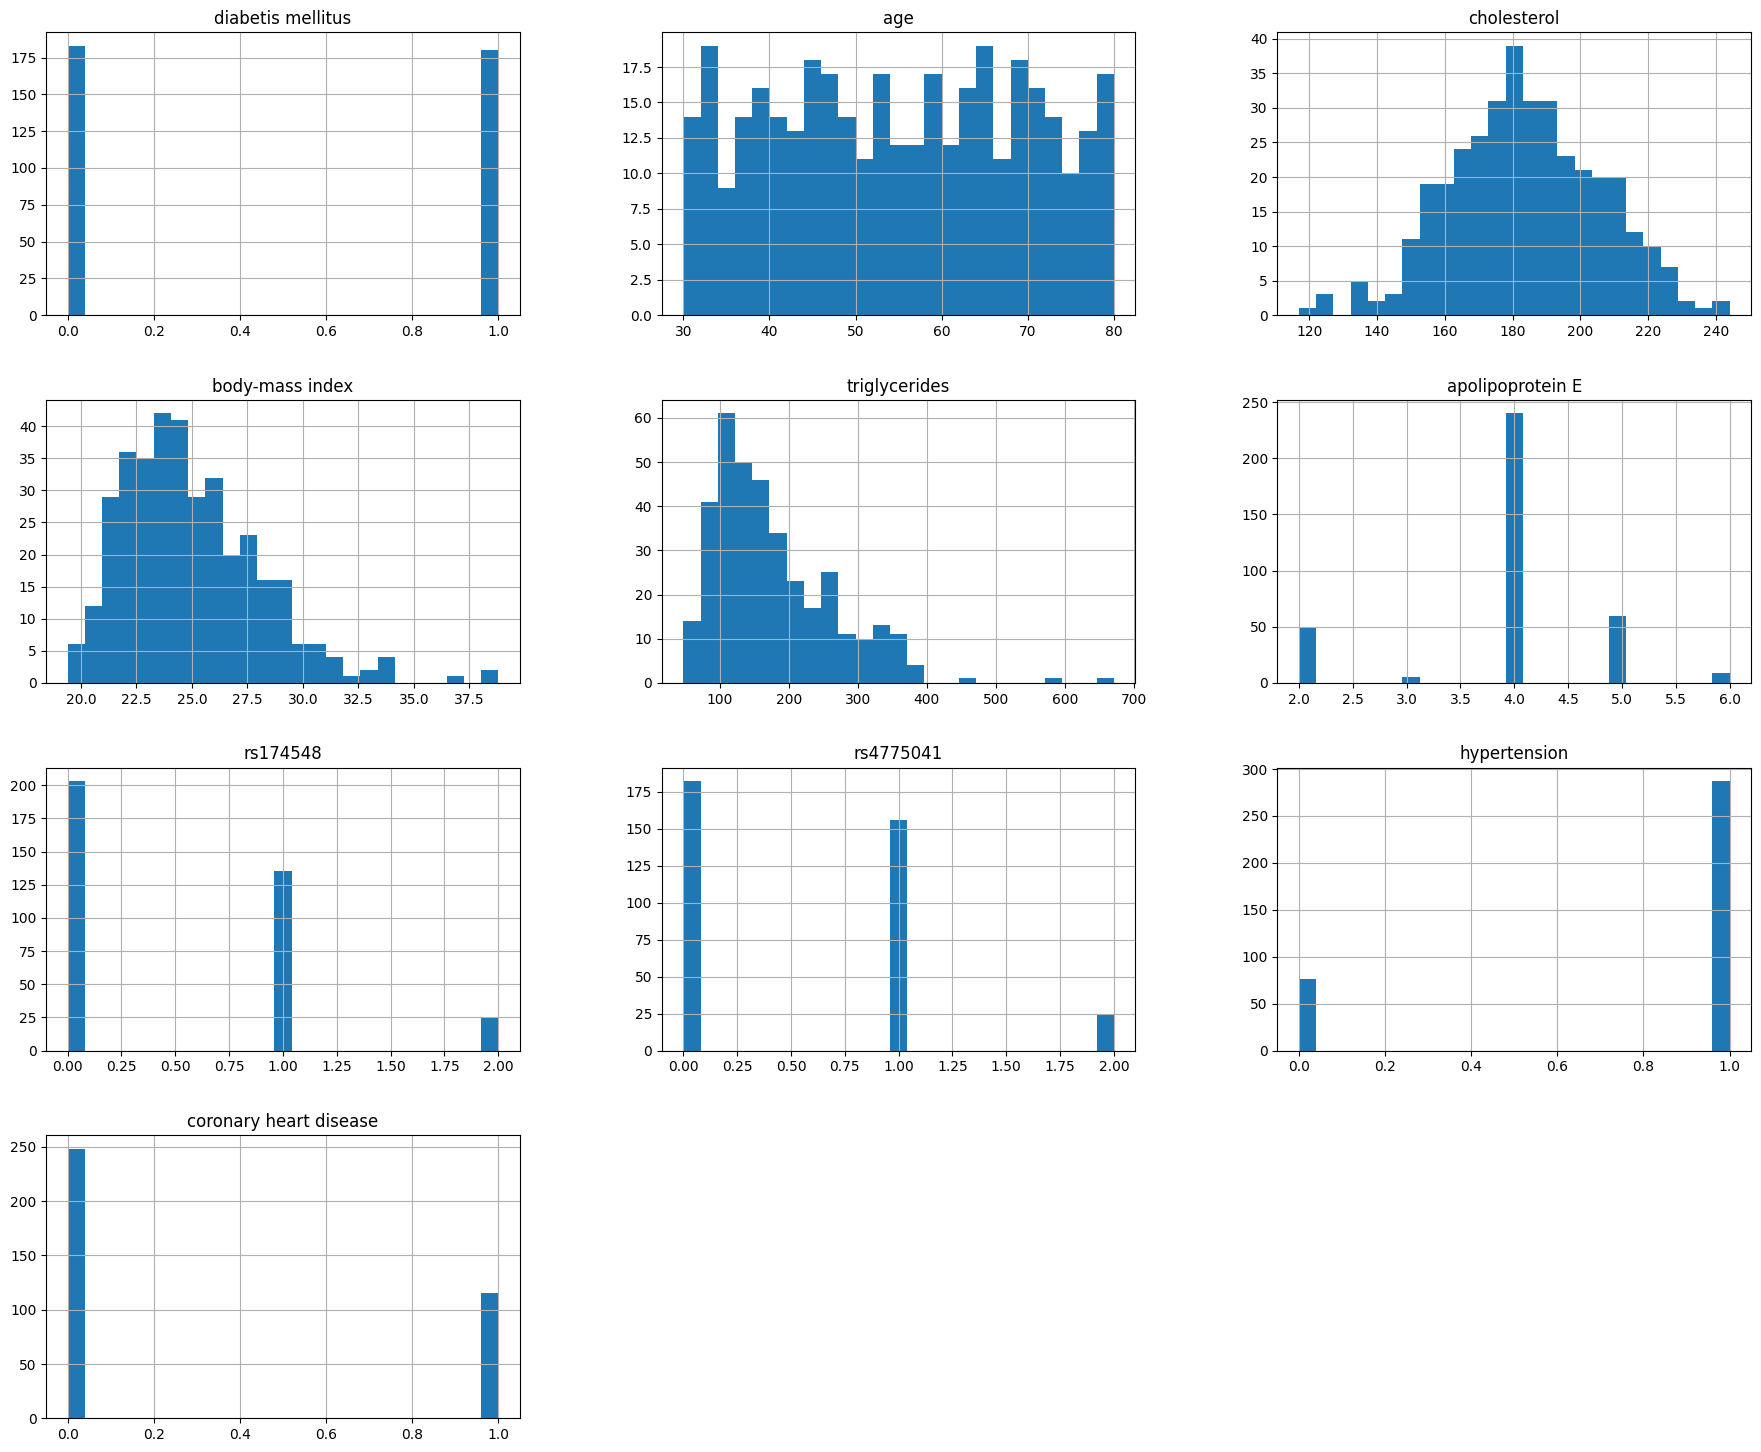

In [ ]:
_ = chol_data.hist(figsize=(22, 18), bins = 25)

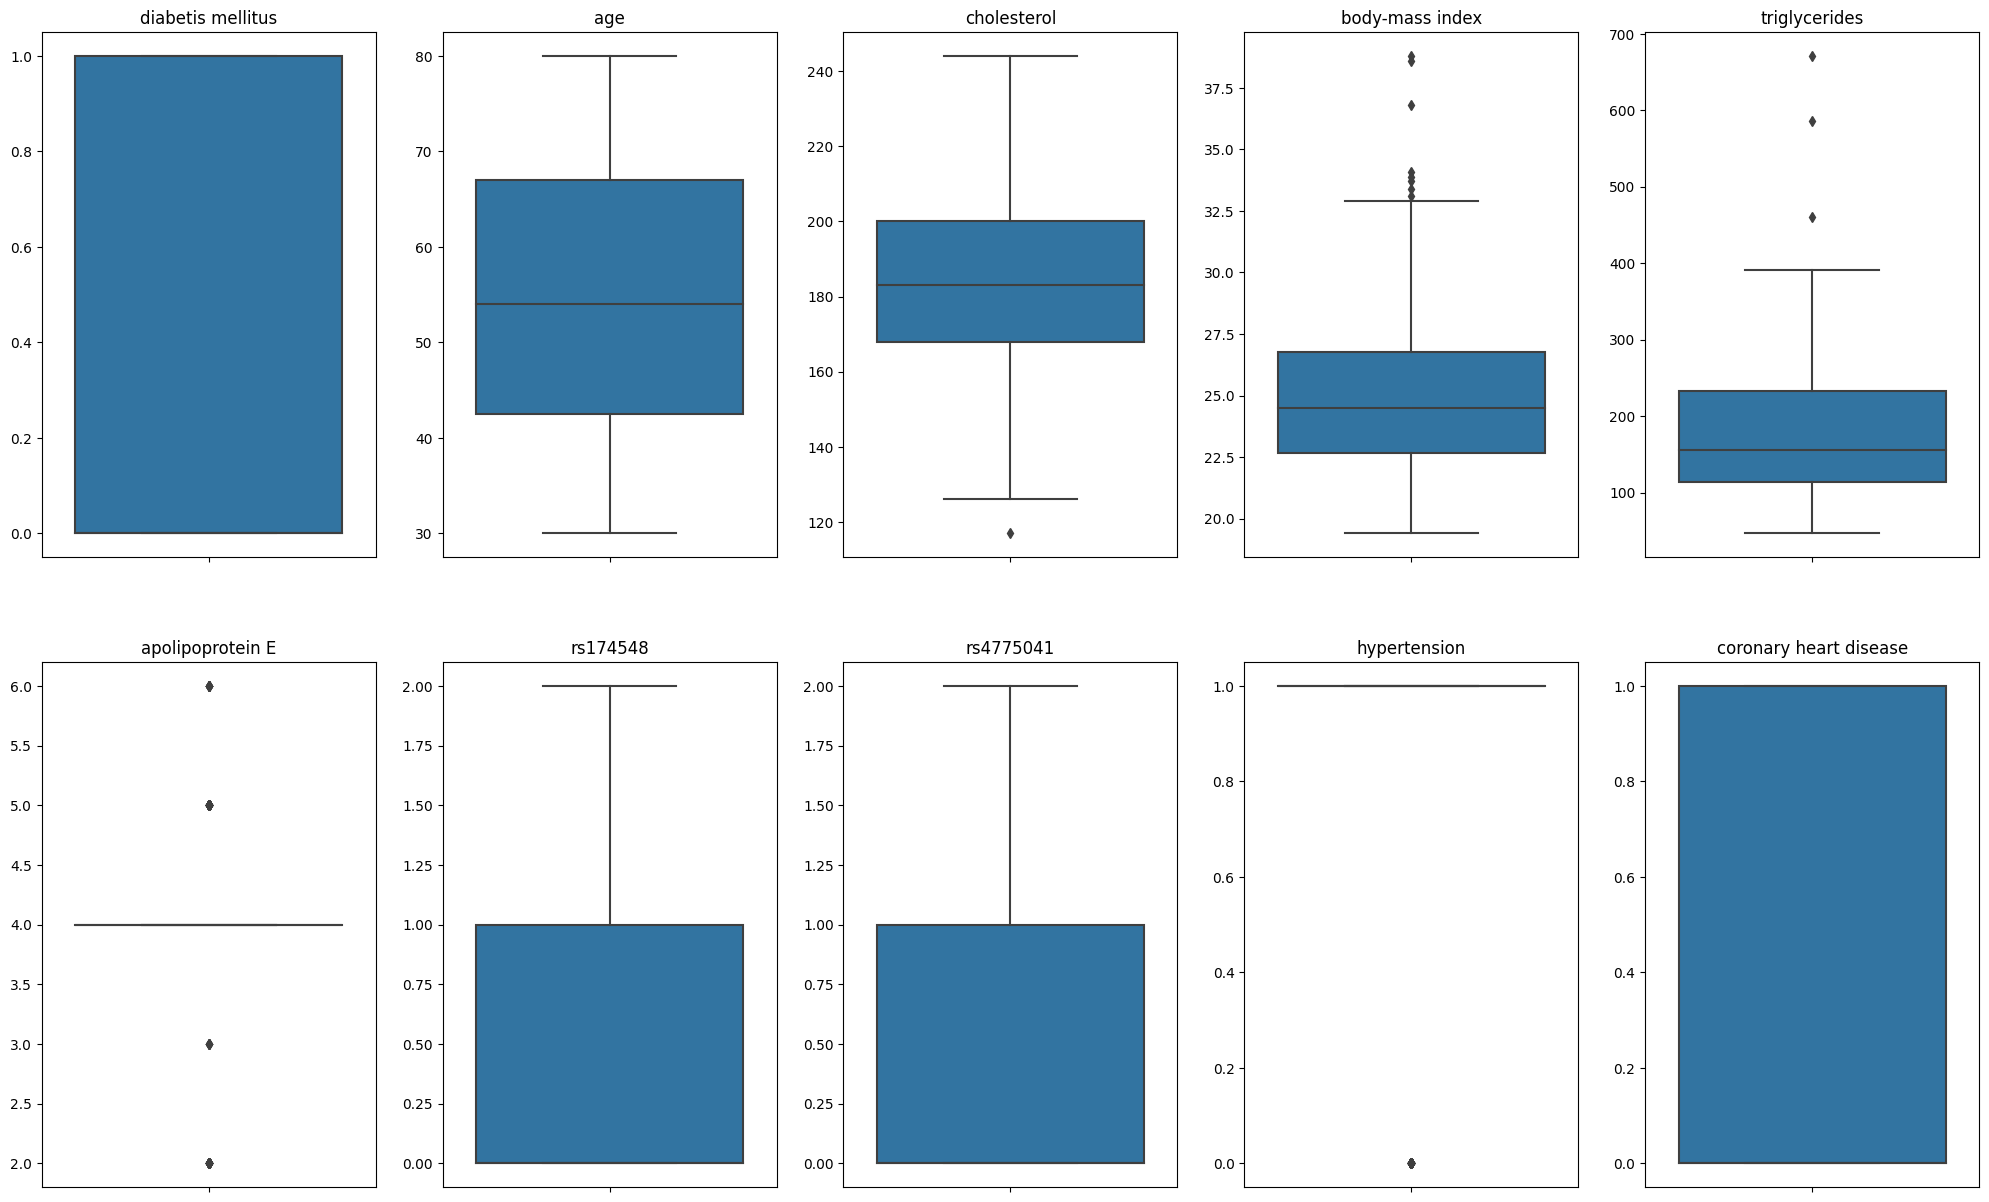

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = chol_data.columns.values.tolist()

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(25,15))
axes = axes.ravel()

for col, ax in zip(cols, axes):
  sns.boxplot(y = chol_data[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel='', ylabel='')

In [ ]:
chol_data['rs174548'].value_counts()

0    203
1    135
2     25
Name: rs174548, dtype: int64

Возраст ("age") похож на равномерное распределение, т.е. дата включает примерно равномерное количество человек разного возраста   
колонки "cholesterol", "BMI", "tryglycerides" являются "истинно числовыми", т.е. изначально мы должны видель какое-то (желательно нормальное) распределение по этим признакам. В принципе, по гистограммам видно характерные купола на графиках этих колонок, однако для "BMI" и "tryglycerides" они смещены влево с пологим хвостом справа. Можно попробовать удалить выбросы, а также в будущем сделать нормализацию и шкалирование.    
Колонки "diabetis mellitus" и "coronary heart disease", как и все оставшиеся изначально являются скорее категориальными, в которых категории закодированы цифрами, по этому для них не может быть никакого распределения и графики получились закономерные    
Для колонок с SNP минорные аллели обозначены цифрой 2, 1 - гетерозигота, 0 - гомозигота дикого типа. Минорные аллели, особенно в гомозиготе встречаются реже, поэтому боксплот смещен вниз (на гистограмме видно соотношение генотипов по SNP)


[0.5] Is there anything strange about any of the features? If yes, what can be done?
 Частично ответила в предыдущей ячейке. Можно убрать выбросы, применить нормализацию+стандартизацию. В принципе можно попробовать трансформировать данные, взяв логарифм или другое преобразование, чтобы привести к нормальному распределению

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
true_numcols = ['cholesterol', 'body-mass index', 'triglycerides']

print(f"Records before: {len(chol_data)}")

low, high = 0.01, 0.99
quantiles = chol_data[true_numcols].quantile([low, high])

for col in quantiles.columns:
  low, high = quantiles[col].tolist()
  mask = (chol_data[col] >= low) & (chol_data[col] <= high)
  chol_data = chol_data[mask]

print(f"Records after: {len(chol_data)}")

Records before: 363
Records after: 340


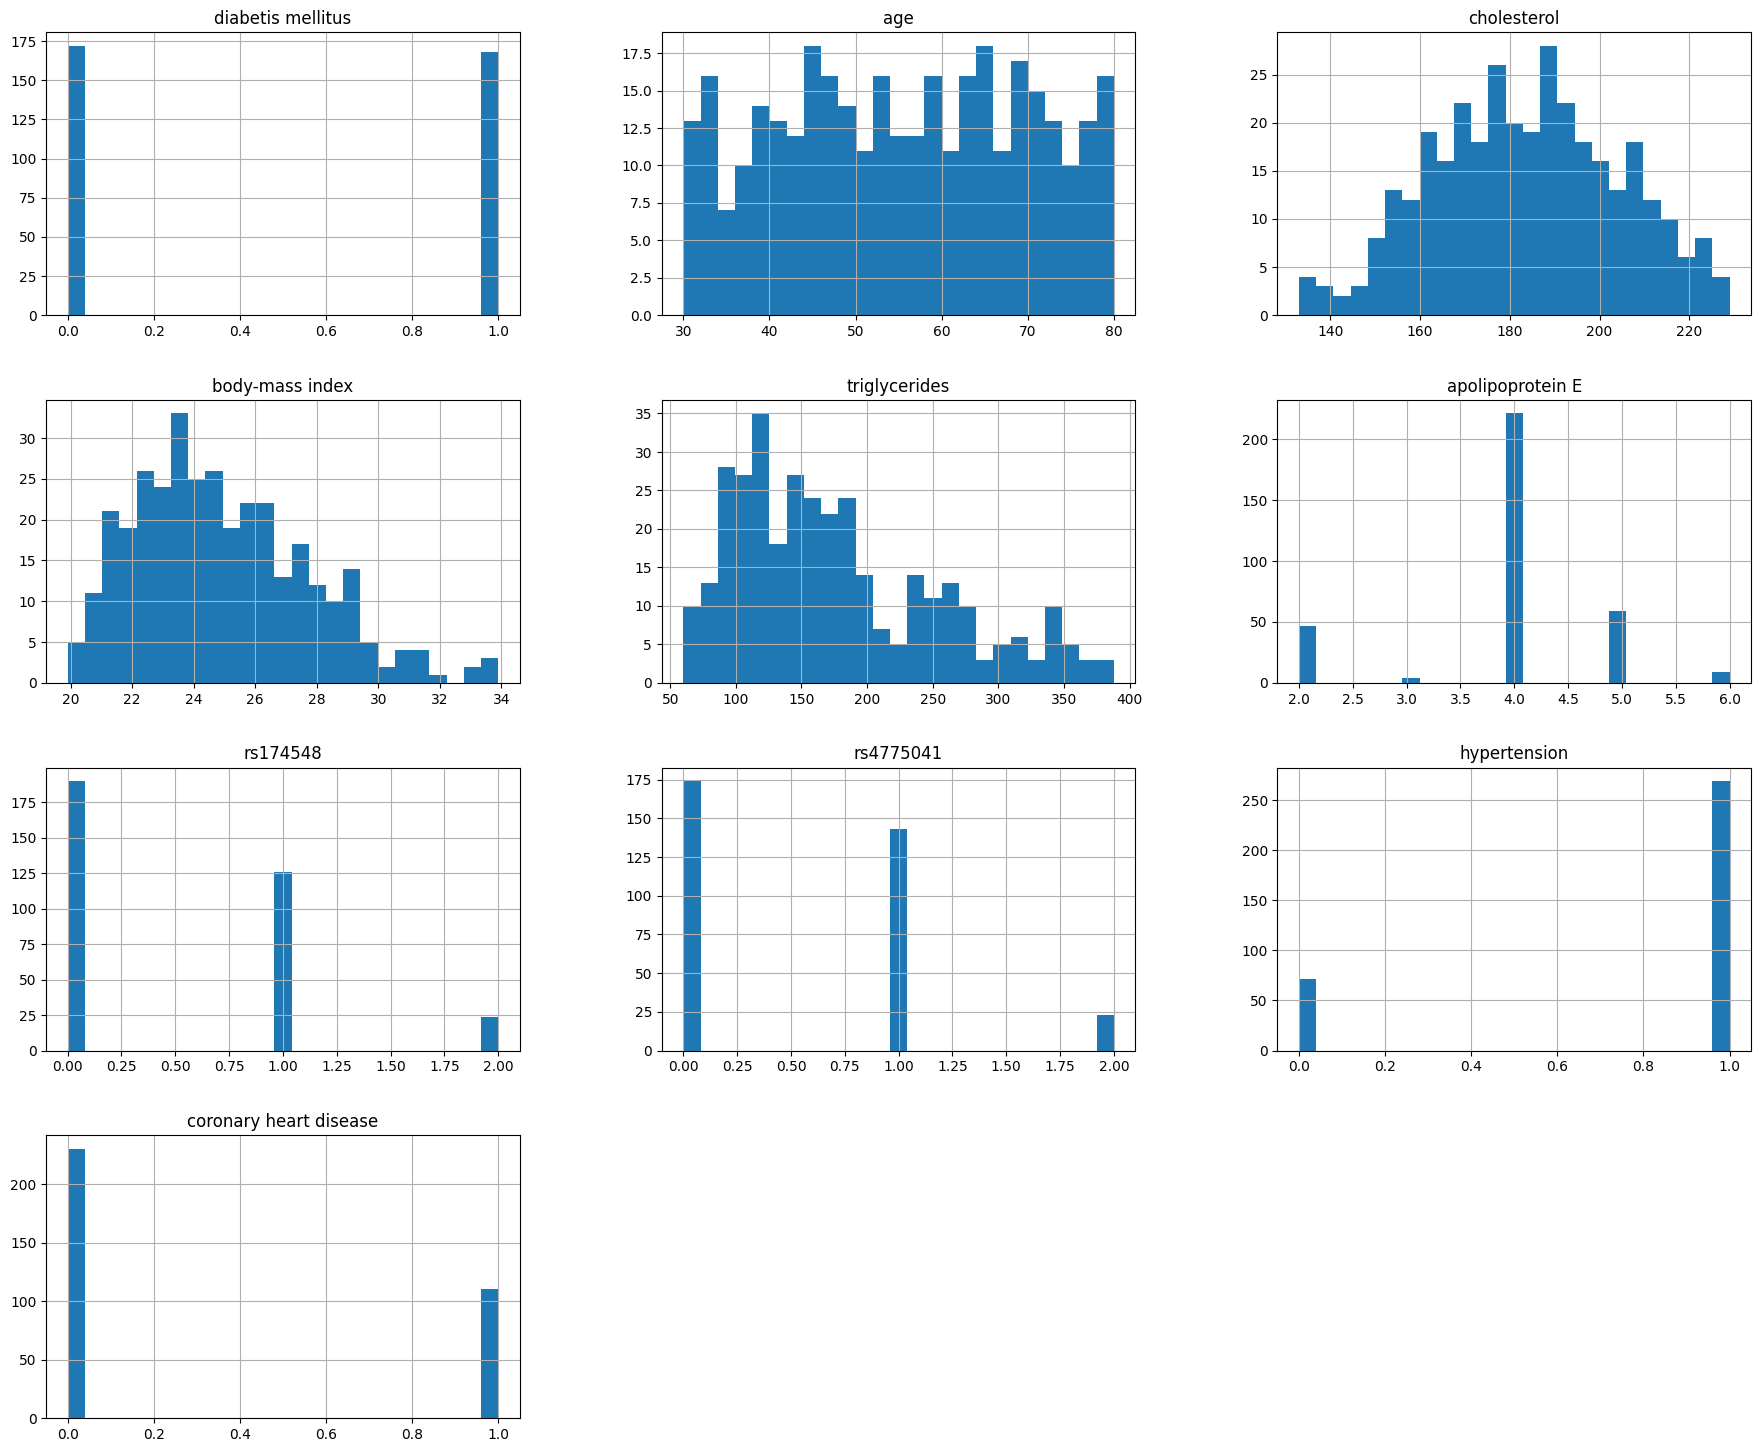

In [ ]:
_ = chol_data.hist(figsize=(22, 18), bins = 25)

Стало лучше, теперь нет сильных выбросов и распределения больше похожи на нормальные

[0.75] Explore the relationship of features and interpret it if possible.

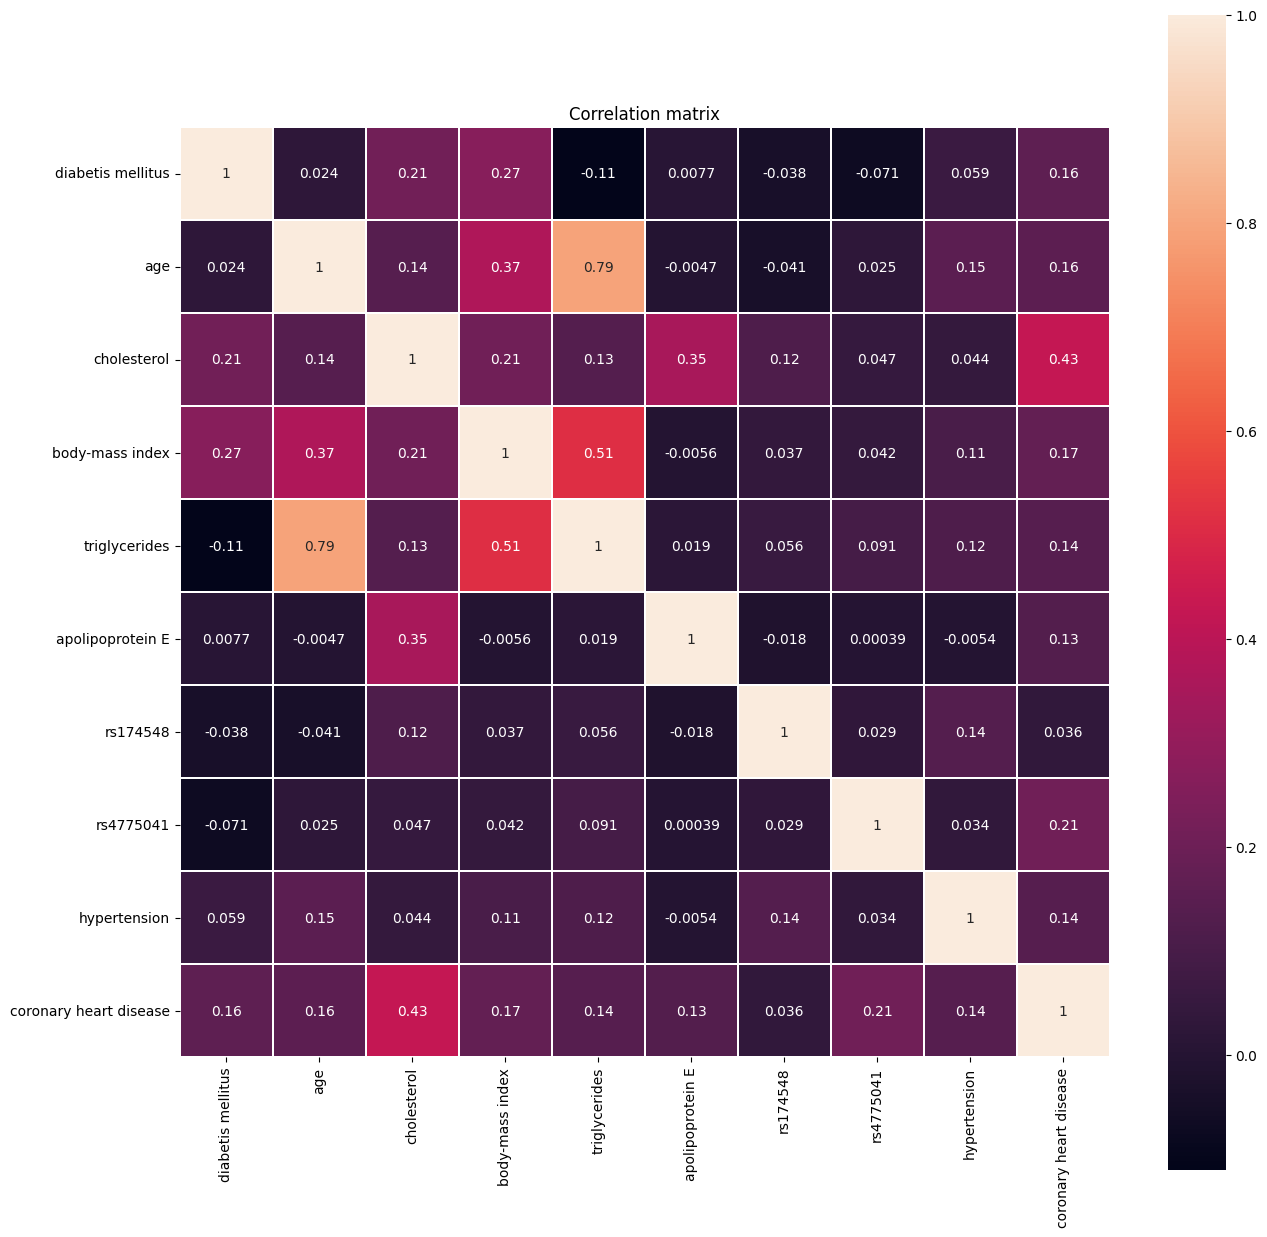

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
corrs = chol_data.corr(method='spearman')

plt.figure(figsize=(15,15))
sns.heatmap(corrs, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix")
plt.show()

Отрицательные корреляции малозначительны. Наиболее сильной является положительная корреляция между возрастом и тригличеридами, что закономерно, т.к. с возрастом могут усиливаться симптомы, которые влияют на концентрацию тригрицеридов: снижение двигательной активности, избыточная масса тела, сахарный диабет. Тригрицериды также повышаются при высоком индексе массы тела (BMI).    
Некоторая корреляция между ишемической болезнью сердца и холестерином тоже объснима. В 90 % случаев причиной ИБС является атеросклероз, который возникает в результате нарушения холестеринового (липидного) обмена и способствует образованию бляшек на стенках коронарных артерий.    
В принципе, нет каких-то высоких корреляций, которые могли бы свидетельствовать о мультиколлинеарности признаков и позволить выбросить какой-либо признак

[0.15] Answer the following questions:

* Why can't categorical attributes be encoded with natural numbers? Категориальные атрибуты могут быть закодированы числами, но это может привести к негативным последствиям. Т.к. мы присваиваем какое-то уникальное число каждой категории модель может неправильно интерпретировать, что одна категория больше другой. Также это может вести к потере информации, т.к. мы не учитываем связи между категориями
* Would fields like 'id' cause the model (not necessarily linear) to overfit? Why? Если 'id' является уникальным модель может не учесть, что эта колонка значима и принять ее за шум. Только если модель научится ассоциировать конкретные значения 'id' с целевой переменной, тогда модель фактически запомнит 'train' и будет переученной. Тогда все показатели качества будут низкими при проверке модели на новых данных.

### Machine Learning [5.5]

[0.35] Split the data into train/test subsets and choose your target performance measure. Explain your choice.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(chol_data.drop('cholesterol', axis = 1), chol_data['cholesterol'], test_size=0.3)
train, test = train_test_split(chol_data, test_size=0.3, random_state = 27)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_pred=y_preds, y_true=y)}')
    print(f'MSE: {mean_squared_error(y_pred=y_preds, y_true=y)}')

#берем метрики R^2 (доля объясненной дисперсии - интерпретируема, показывает процент данных, которые модель может объяснить)
#и MSE (чувствительна к выбросам, показывает средний квадрат ошибки)

[0.15] Answer the following questions:

* Why do we need to scale the feature matrix before training machine learning models? Чтобы масштаб признаков не влиял на предсказания. После шкалирования вес признака будет свиетельствовать о его вкладе в модель
* Why do you think we don't produce scaling of One Hot encoded features? Поскольку эти столбцы не имеют значимого числового масштаба, как правило, нет необходимости применять масштабирование к категориальным признакам, закодированным в виде чисел. Также это может сказаться на интерпретируемости, т.к. изначально мы призваиваем какому-то категориальному значению определенное число

[0.35] Apply transformation to data, if needed. Justfy your choice. Можно использовать PowerTransformer т к он позволяет бороться с большой дисперсией и убирает хвосты (skewness). За одно и приводит к одному масштабу. Применим его к истинно числовым колонкам

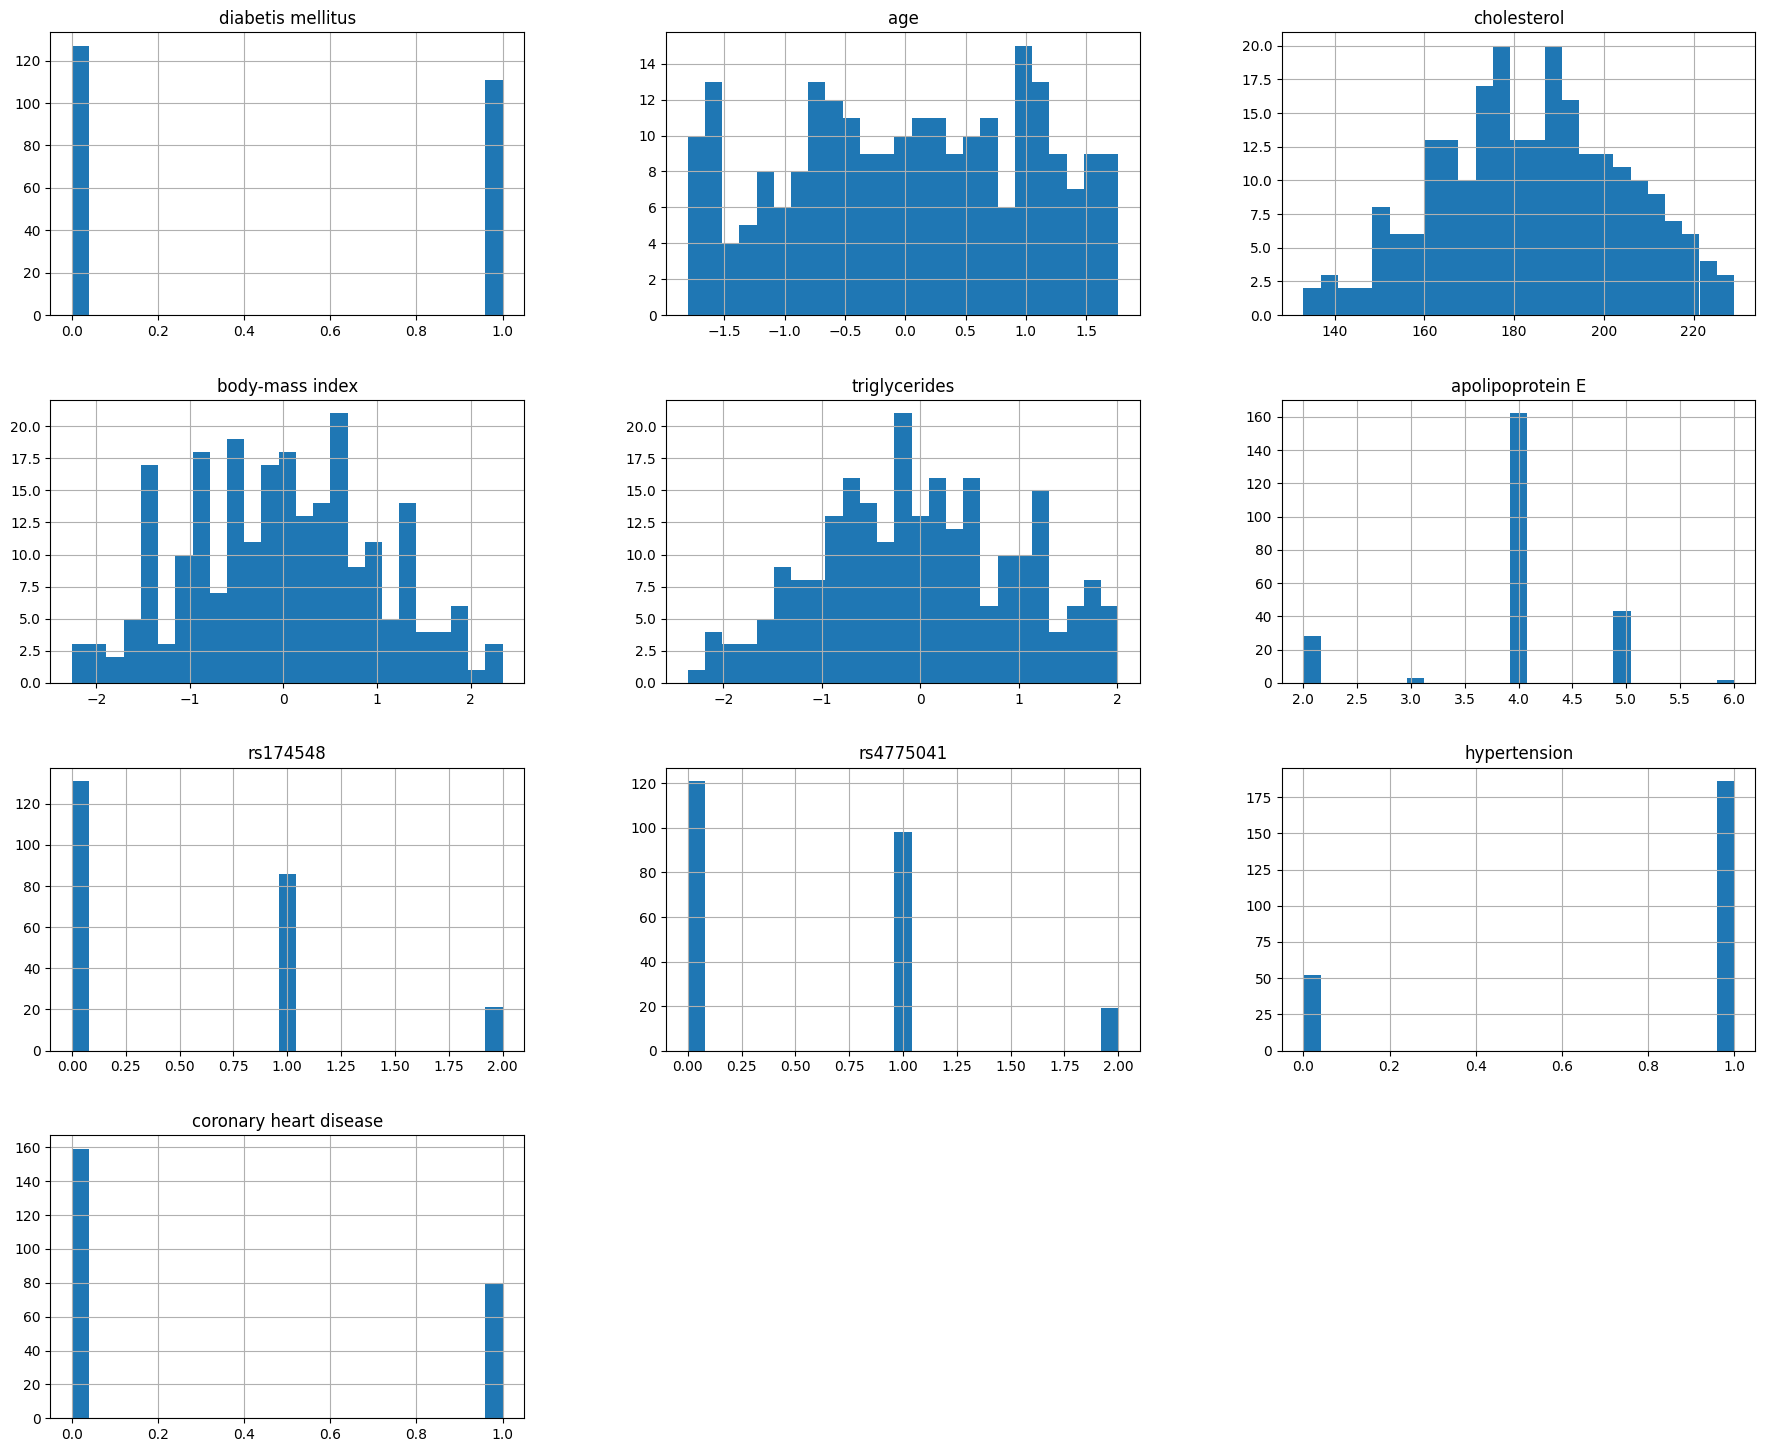

In [ ]:
from sklearn.preprocessing import PowerTransformer

numcols = ['age', 'body-mass index', 'triglycerides']
scaler = PowerTransformer()

train[numcols] = scaler.fit_transform(train[numcols])
test[numcols] = scaler.fit_transform(test[numcols])

_ = train.hist(figsize=(22, 18), bins = 25)

[0.25] Train a simple linear regression model, and rank it using test set. How well the model is doing?

In [ ]:
y_train, y_test = train['cholesterol'], test['cholesterol']
X_train = train.drop('cholesterol', axis = 1)
X_test = test.drop('cholesterol', axis = 1)

assert X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]
assert X_train.shape[1] == X_test.shape[1] == chol_data.shape[1] - 1

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: 0.2771732927197308
MSE: 319.7912076951979


[0.1] Answer the following question:

* From a simple linear regression model point of view, are the largest weights always the most important ones? Нет, большие веса могут присваиваться переменным, у которых сами значения больше по масштабу (без стандартизации)
Также если наблюдается мультиколлинеарность, т е высокая корреляция между фичами, то веса могут быть любыми (в том числе и очень высокими) у абсолютно рандомных признаков, которые коррелируют друг с другом. т е если один вес увеличить а другой уменьшить ошибка не возрастет.

[0.25] Obtain weights of the linear regression equation for this model and interpret them.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
print("Weights:", lr.coef_)
print("Intercept:", lr.intercept_)

Weights: [ 5.85723007  1.5333227   2.29225839 -0.05134664  7.58659334  2.15575655
 -1.21144301 -0.87323021 16.43557868]
Intercept: 146.00957662624108


In [ ]:
coefs = lr.coef_
coefs = coefs.tolist()
pred_cols = X_train.columns.values.tolist()
coef_df = pd.DataFrame([coefs], columns = pred_cols)
coef_df

,diabetis mellitus,age,body-mass index,triglycerides,apolipoprotein E,rs174548,rs4775041,hypertension,coronary heart disease
0,5.85723,1.533323,2.292258,-0.051347,7.586593,2.155757,-1.211443,-0.87323,16.435579


Наибольший вклад в уровень холестерина вносят ишемическая болезнь сердца, АПО Е, диабет. Мне кажетсся, что не стоит доверять этим коэффициентам ибо метрики показывают что модель имеет слабую предсказательную способность

[0.25] What are residuals? Make a residuals vs predictions plot below. What do you observe?

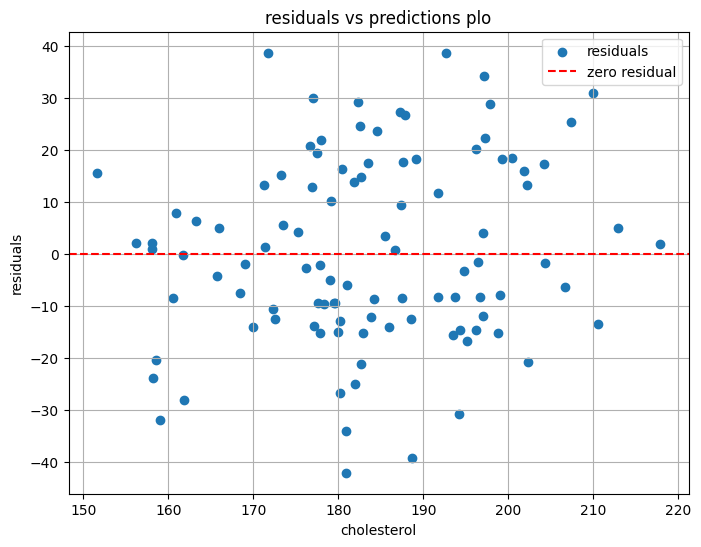

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
#In linear regression, a residual is the difference between the actual value and the value predicted by the model (y-ŷ) for any given point
residuals = lr.predict(X_test) - y_test

plt.figure(figsize=(8, 6))
plt.scatter(lr.predict(X_test), residuals, label='residuals')
plt.axhline(y=0, color='r', linestyle='--', label='zero residual')
plt.xlabel('cholesterol')
plt.ylabel('residuals')
plt.title('residuals vs predictions plo')
plt.legend()
plt.grid(True)
plt.show()

Не наблюдаю никакой закономерности, точки (предсказания) по всей ширине графика распределены олинаково хаотично от красной линии. Можно наблюдать что разбросы очень большие. Уровни холестерина варьируются от -40 до 40 и разбросы тоже.

[0.25] Now train the Lasso regression model. On a logarithmic scale, search for the optimal value of the regularization coefficient alpha.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

logscale = 10**np.linspace(-10, 10, 100)

Lasso_grid_search = GridSearchCV(Lasso(), {'alpha': logscale}, cv = 5, scoring = 'r2')

Lasso_grid_search.fit(X_train, y_train)

print('best alpha Lasso', Lasso_grid_search.best_params_)
print('best score Lasso', Lasso_grid_search.best_score_)


best alpha Lasso {'alpha': 0.31257158496882353}
best score Lasso 0.2866617033882132


[0.25] For each sampled alpha for Lasso, count the number of zero weights in the model and plot its dependence on alpha. How much will we have to lose in prediction quality if we want to get rid of at least half of the features using Lasso?

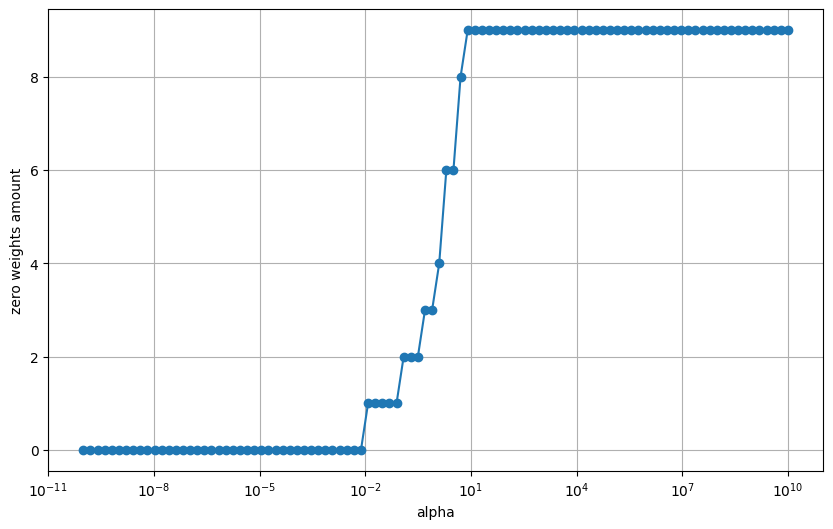

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
alphas = {}
for a in logscale:
  las = Lasso(alpha = a)
  las.fit(X_train, y_train)
  zero_w = np.sum(las.coef_ == 0)
  alphas[a] = zero_w

alpha_values = list(alphas.keys())
zero_counts = list(alphas.values())

plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, zero_counts, marker='o')
plt.xlabel('alpha')
plt.ylabel('zero weights amount')
plt.grid(True)
plt.show()

[0.5] Train and optimize hyperparameters for Elastic Net, Ridge, SVM and KNN.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, Ridge



In [ ]:
grid_ridge = {'alpha' : logscale}
grid_search_r = GridSearchCV(Ridge(), grid_ridge, cv=5, scoring = 'r2')
grid_search_r.fit(X_train, y_train)

print("Best params Ridge", grid_search_r.best_params_)
print('best score Ridge', grid_search_r.best_score_)



Best params Ridge {'alpha': 8.111308307896856}
best score Ridge 0.2858751826423225


In [ ]:
grid_elastic = {'alpha' : logscale,
                'l1_ratio' : np.linspace(0,1,10)}
grid_search_e = GridSearchCV(ElasticNet(max_iter = 10000, ), grid_elastic, cv=5, scoring = 'r2', n_jobs = 3)
grid_search_e.fit(X_train, y_train)

print("Best params ElasticNet", grid_search_e.best_params_)
print('best score ElasticNet', grid_search_e.best_score_)




Best params ElasticNet {'alpha': 0.19630406500402683, 'l1_ratio': 0.7777777777777777}
best score ElasticNet 0.2885534042824983


In [ ]:
grid_svm = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100, 1000]
}
grid_search_s = GridSearchCV(SVR(), grid_svm, cv=5, scoring = 'r2')
grid_search_s.fit(X_train, y_train)

print("Best params svm", grid_search_s.best_params_)
print('best score svm', grid_search_s.best_score_)



Best params svm {'C': 10, 'kernel': 'linear'}
best score svm 0.2676157674161245


In [ ]:
grid_knn = {
    'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine'],
}

grid_search_knn = GridSearchCV(KNeighborsRegressor(), grid_knn, cv=5, scoring = 'r2')
grid_search_knn.fit(X_train, y_train)

print("Best params KNN", grid_search_knn.best_params_)
print('best score KNN', grid_search_knn.best_score_)

Best params KNN {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
best score KNN 0.1929896996764981


[0.25] Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?  
Для Ridge и ElasticNet я взяла все гиперпараметры, которые можно подбирать. Фишка SVM заключаеся в том, что с помощью разных ядер можно посмотреть как ложатся на прямую различные нелинейные преобразования, также проверила разные С, которые отвечают за штраф за неправильно предсказанные точки. В кнн я посмотрело несколько значений числа соседей, а также способы подсчета расстояния между ними и вклад соседа в предсказание в зависимости от расстояния.
В интернете нашла, что число фолдов для кросс-валидации модет быть равно числу фичей. Но если данных мало, то лучше брать меньше. А сейчас данных мало. 1/5 = 20% даннных идет на тест, что звучит разумно.   

[0.85] Use test set to rank optimized models. Describe and interpret results.

In [ ]:
print('best alpha Lasso', Lasso_grid_search.best_params_)
print('best score Lasso', Lasso_grid_search.best_score_)

print("Best params Ridge", grid_search_r.best_params_)
print('best score Ridge', grid_search_r.best_score_)

print("Best params ElasticNet", grid_search_e.best_params_)
print('best score ElasticNet', grid_search_e.best_score_)

print("Best params svm", grid_search_s.best_params_)
print('best score svm', grid_search_s.best_score_)

print("Best params KNN", grid_search_knn.best_params_)
print('best score KNN', grid_search_knn.best_score_)

best alpha Lasso {'alpha': 0.31257158496882353}
best score Lasso 0.2866617033882132
Best params Ridge {'alpha': 8.111308307896856}
best score Ridge 0.2858751826423225
Best params ElasticNet {'alpha': 0.19630406500402683, 'l1_ratio': 0.7777777777777777}
best score ElasticNet 0.2885534042824983
Best params svm {'C': 10, 'kernel': 'linear'}
best score svm 0.2676157674161245
Best params KNN {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
best score KNN 0.1929896996764981


In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
l = Lasso(alpha = 0.31257158496882353)
l.fit(X_train, y_train)
print('Lasso')
print_metrics(l.predict(X_test), y_test)

r = Ridge(alpha = 8.111308307896856)
r.fit(X_train, y_train)
print('Ridge')
print_metrics(r.predict(X_test), y_test)

e = ElasticNet(alpha = 0.19630406500402683, l1_ratio = 0.7777777777777777)
e.fit(X_train, y_train)
print('ElasticNet')
print_metrics(e.predict(X_test), y_test)

s = SVR(kernel='linear', C = 10)
s.fit(X_train, y_train)
print('SVM')
print_metrics(s.predict(X_test), y_test)

k = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 15, weights = 'uniform')
k.fit(X_train, y_train)
print('KNN')
print_metrics(k.predict(X_test), y_test)

Lasso
R^2: 0.2761177294976457
MSE: 320.2582073704857
Ridge
R^2: 0.2805857674746276
MSE: 318.2814690370845
ElasticNet
R^2: 0.27801105313270535
MSE: 319.4205678011181
SVM
R^2: 0.2089627273305702
MSE: 349.96875767179836
KNN
R^2: 0.32882288429585427
MSE: 296.94052287581707


[0.85] Perform a feature importance analysis for all models (where applicable), interpret the results, and make appropriate comparisons.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ
# feature importance analysis можно сделать для линейных моделей
lcoefs = lr.coef_.tolist()
rcoefs = r.coef_.tolist()
ecoefs = e.coef_.tolist()

#pred_cols = X_train.columns.values.tolist()
coef_df = pd.DataFrame(list(zip(lcoefs, rcoefs, ecoefs)), index = pred_cols, columns = ['lin reg', 'ridge', 'elastic net'])
coef_df

,lin reg,ridge,elastic net
diabetis mellitus,5.857230,5.294134,4.709941
age,1.533323,1.526079,1.327601
body-mass index,2.292258,2.467299,2.468604
triglycerides,-0.051347,-0.074713,0.000000
apolipoprotein E,7.586593,7.361402,7.109830
rs174548,2.155757,1.902099,1.456105
rs4775041,-1.211443,-0.718238,-0.153471
hypertension,-0.873230,-0.447899,-0.000000
coronary heart disease,16.435579,14.119029,12.969002


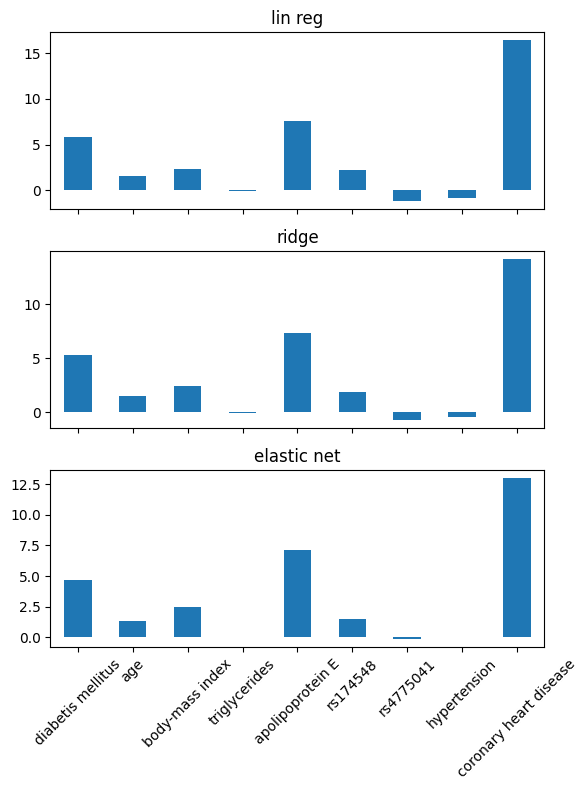

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (6,8), sharex = True)

for i, column in enumerate(coef_df.columns):
    ax = axes[i]
    coef_df[column].plot(kind='bar', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(coef_df.index, rotation = 45)

plt.tight_layout()

plt.show()

Для всех моделей наибольший вклад вносит ишемическая болезнь сердца, далее идут APO E, диабет, SNP rs174548.

[0.85] Answer the following questions:

* Which model works the best with cholesterol data? Explain, what could be the reason for it.   
Все модели одинаково плохо предсказывают, но knn лучше всех судя по R^2 (0.32882288429585427) и MSE (296.94052287581707). В knn мы используем расстояние между соседями для предсказания какой-то точки. Возможно, в данных равномерная дисперсия, поэтому knn предсказывает лучше остальных моделей. Также если в данных вообще не существует линейной корреляции с таргетом, то, думаю, knn может оказаться лучше линейных моделей.
* Based on your analysis above, have you found expected/unexpected important features? Is the connection with cholesterol level seems logical? Ишемическая болезнь сердца является заболеванием, связанным с сужением или блокировкой артерий. Это может привести к нарушению поставки кислорода к сердечной мышце. Повышенные уровни холестерина могут способствовать развитию ИБС.
Ген APOE кодирует белок аполипопротеин E, который играет роль в метаболизме липидов. Разные аллели этого гена могут влиять на уровни холестерина в крови. Например, аллель е4 гена APOE связан с более высокими уровнями холестерина и увеличенным риском развития атеросклероза и ИБС.
Диабет может влиять на уровни холестерина. Уровни сахара в крови, которые сопровождают диабет, могут повысить уровни холестерина, особенно LDL-холестерина. Индекс массы тела также тесно связан с повышенным холестерином. SNP rs174548 может влиять на повышение концентрации фосфолипидов в плазме. Эфиры холестерина переносятся с помощью фосфолипидов и
липопротеинов крови и тканевой жидкости. Это транспортная форма
холестерина, которая может быть повышена при увеличении фосфолипидов.
* Would you suggest to use that model to a doctor or use it in a real study? Нет, потому что R^2 получился даже ниже 0.5, это значит, что у модели очень плохая предсказательная способность. Возможно, проблемы с данными либо модели, которые мы использовали не подходят для этих данных

# Extra points [2.0]

[0.5 + 1.0] Implement stochastic gradient descent for linear regression from scrath. Make it in a form of python function!

[0.5] If you make it as simple as the one-feature model we looked at in the class, [1.0] for implementation that works with whole cholesterol dataset.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

[0.5] Use any implementation of SGD to calculate MSE at each step. Make a plot that represents how MSE changes with each step. What learning rate and batch size works best for you?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ